# Data Visualization of Crime in Vancouver
This notebook will be an exercise in plotting crime statistics in Vancouver from the years 2003 to 2018. The data was taken from Vancouver's Open Data Catalogue, and can be found [here](https://data.vancouver.ca/datacatalogue/crime-data-attributes.htm#X). As written in the attributes, "Offence Against a Person" and "Homicide" have null values to protect the privacy of the victim. For this reason, this notebook will not dive into the statistics of those crimes deeply. 

The main purpose of this exercise is to gain better working knowledge of geopandas and practice using other types of files, such as .shp files. 

In [55]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [56]:
crime_csv = pd.read_csv('crime_csv_all_years.csv')
crime_shp = gpd.read_file('crime_shp_all_years.shp')

In [57]:
print('Number of rows of data in the csv file:', crime_csv.shape[0])
print('Number of rows of data in the shp file:', crime_shp.shape[0])
print('Difference between the two datasets:', crime_csv.shape[0] - crime_shp.shape[0])

Number of rows of data in the csv file: 601713
Number of rows of data in the shp file: 541373
Difference between the two datasets: 60340


In [58]:
print('Columns in CSV file:', list(crime_csv.columns))
print('Columns in SHP file:', list(crime_shp.columns))

Columns in CSV file: ['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y']
Columns in SHP file: ['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'H_BLOCK', 'N_HOOD', 'geometry']


In [59]:
print('Types of crime in CSV file:', list(crime_csv['TYPE'].unique()))
print('\n')
print('Types of crime in SHP file:', list(crime_shp['TYPE'].unique()))

Types of crime in CSV file: ['Theft from Vehicle', 'Break and Enter Residential/Other', 'Mischief', 'Offence Against a Person', 'Break and Enter Commercial', 'Theft of Vehicle', 'Theft of Bicycle', 'Other Theft', 'Vehicle Collision or Pedestrian Struck (with Injury)', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 'Homicide']


Types of crime in SHP file: ['Theft from Vehicle', 'Break and Enter Residential/Other', 'Mischief', 'Break and Enter Commercial', 'Theft of Vehicle', 'Theft of Bicycle', 'Other Theft', 'Vehicle Collision or Pedestrian Struck (with Injury)', 'Vehicle Collision or Pedestrian Struck (with Fatality)']


In [60]:
import collections

csv_counter = dict(collections.Counter(crime_csv['TYPE']))
shp_counter = dict(collections.Counter(crime_shp['TYPE']))


In [61]:
def loop_dict(dictionary):
    for k, v in dictionary.items():
        print(k, ':', v)

print('Types of crimes in CSV file: \n')
loop_dict(csv_counter)

print('\n')
print('Types of crimes in SHP file: \n')
loop_dict(shp_counter)

In [62]:
num_offences = len(crime_csv[crime_csv['TYPE']=='Offence Against a Person'])
num_homicides = len(crime_csv[crime_csv['TYPE']=='Homicide'])

if (num_homicides+num_offences)==(crime_csv.shape[0]-crime_shp.shape[0]):
    print('SHP file is CSV file with "Offence Against a Person" and "Homicide" crimes removed.')
else:
    print('No match.')

SHP file is CSV file with "Offence Against a Person" and "Homicide" crimes removed.


In [63]:
years = list(crime_csv['YEAR'].unique())
print('Years included in the datasets:', years)

Years included in the datasets: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [64]:
def check_null(data):
    data_dict = {}
    for col in data.columns:
        data_dict[col]=sum(data[col].isnull())
    return data_dict

In [65]:
print('Null values in csv file: \n')
loop_dict(check_null(crime_csv))

Null values in csv file: 

TYPE : 0
YEAR : 0
MONTH : 0
DAY : 0
HOUR : 60340
MINUTE : 60340
HUNDRED_BLOCK : 13
NEIGHBOURHOOD : 62772
X : 0
Y : 0


In [66]:
print('Null values in shp file: \n')
loop_dict(check_null(crime_shp))

Null values in shp file: 

TYPE : 0
YEAR : 0
MONTH : 0
DAY : 0
HOUR : 0
MINUTE : 0
H_BLOCK : 13
N_HOOD : 2432
geometry : 0


In [67]:
crime_shp_null = crime_shp[crime_shp['N_HOOD'].isnull()]


In [68]:
crime_shp_null_count = collections.Counter(crime_shp_null['TYPE'])

In [69]:
crime_shp_null_count

Counter({'Mischief': 293,
         'Theft of Vehicle': 74,
         'Theft from Vehicle': 1918,
         'Theft of Bicycle': 120,
         'Break and Enter Residential/Other': 3,
         'Break and Enter Commercial': 3,
         'Vehicle Collision or Pedestrian Struck (with Injury)': 15,
         'Other Theft': 5,
         'Vehicle Collision or Pedestrian Struck (with Fatality)': 1})

In [70]:
crime_shp[crime_shp['H_BLOCK'].isnull()]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,H_BLOCK,N_HOOD,geometry
12869,Theft from Vehicle,2003,7,11,7,30,None,West Point Grey,POINT (485156 5457770)
13595,Other Theft,2003,8,8,14,30,None,Kitsilano,POINT (489325 5457606)
55975,Break and Enter Residential/Other,2004,5,13,9,0,None,Mount Pleasant,POINT (492807 5457236)
77767,Mischief,2004,7,3,4,30,None,Central Business District,POINT (490939 5458504)
77768,Mischief,2004,8,3,11,23,None,Strathcona,POINT (492879 5457361)
83595,Other Theft,2004,11,5,16,0,None,Central Business District,POINT (491490 5458911)
112812,Other Theft,2005,7,18,17,52,None,Strathcona,POINT (493928 5457452)
113496,Theft from Vehicle,2005,8,15,6,3,None,Mount Pleasant,POINT (492366 5456595)
115106,Theft of Vehicle,2005,2,12,22,30,None,Victoria-Fraserview,POINT (495178 5452000)
146949,Break and Enter Residential/Other,2006,6,21,4,0,None,Oakridge,POINT (491854 5452682)


Looking at the null values in the SHP file, it seems that only the null values for 'N_HOOD' would be an issue as the 'geometry' or 'points' are all the same and do not indicate a neighbourhood. Null values for 'H_BLOCK' at least have a neighbourhood and geometrical point available for plotting. Given the size of the data and the fact that there would not be an easy way to determine the missing neighbourhood/geometry, I will remove those data points with the null 'N_HOOD' values. 

# Plotting the SHP file using Geopandas
In this section, I will use Geopandas to plot the crime_shp file and also a shp file of the public streets of Vancouver (from the Open Data Catalogue). I am using the shp file since the CSV file contains information that does not have location information (e.g. those that have been removed to protect the privacy of victims).

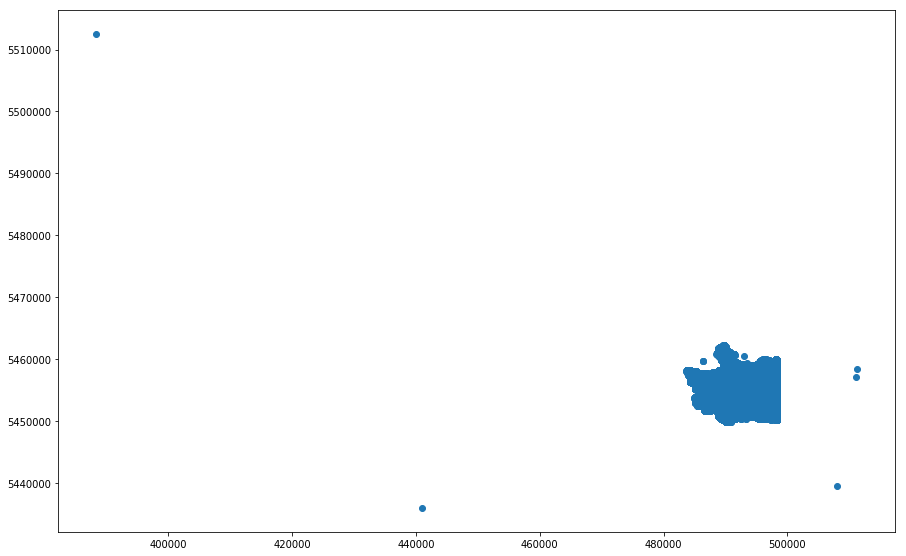

In [71]:
fig1, ax1 = plt.subplots(figsize=(15,15))
crime_shp.plot(ax=ax1)

In [72]:
# Remove the outliers
outliers_idx = []
for i in range(len(crime_shp.geometry)):
    x_arg = list(crime_shp.geometry.iloc[i].coords)[0][0]
    if ((x_arg < 460000) | (x_arg > 500000)):
        outliers_idx.append(i)
crime_shp.drop(outliers_idx, inplace=True)

In [73]:
# Remove all null values 
crime_shp=crime_shp[~crime_shp['N_HOOD'].isnull() ]

In [74]:
# Tried to remove all 2019 data in the above snippet by doing ~crime_shp['NHOOD'].isnull() | ~crime_shp['YEAR']==2019 but it 
# didn't work, not sure why
crime_shp=crime_shp[~(crime_shp['YEAR']==2019)]


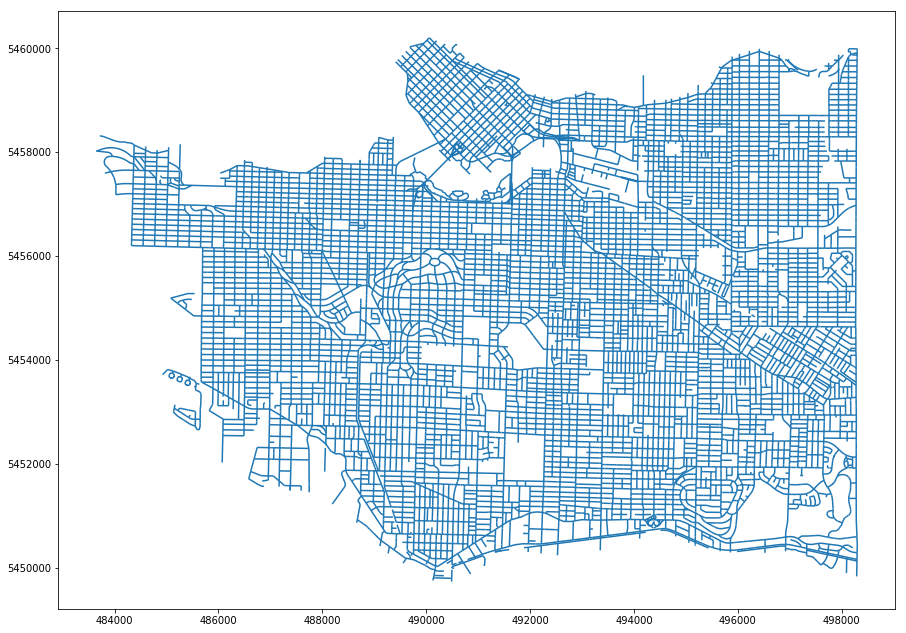

In [75]:
# Load the public streets shp file 
van_map = gpd.read_file('.\shape_city_streets\public_streets.shp')
fig2, ax2 = plt.subplots(figsize=(15,15))
van_map.plot(ax=ax2)
plt.show()

In [76]:
print('CRS of crime SHP file:', crime_shp.crs)
print('CRS of Vancovuer public streets SHP file:', van_map.crs)

CRS of crime SHP file: {'init': 'epsg:26910'}
CRS of Vancovuer public streets SHP file: {'init': 'epsg:26910'}


As the file contains data from 2003 to 2018, I will only plot data from 2018. I will examine the statistics for each year in a separate section. 

In [77]:
crime_shp_2018 = crime_shp[crime_shp['YEAR']==2018]
crime_shp_2018.TYPE.unique()
# Given the amount of data, I will split the types of crime into separate maps 

array(['Break and Enter Commercial', 'Other Theft', 'Mischief',
       'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Theft of Bicycle', 'Theft of Vehicle',
       'Break and Enter Residential/Other',
       'Vehicle Collision or Pedestrian Struck (with Fatality)'],
      dtype=object)

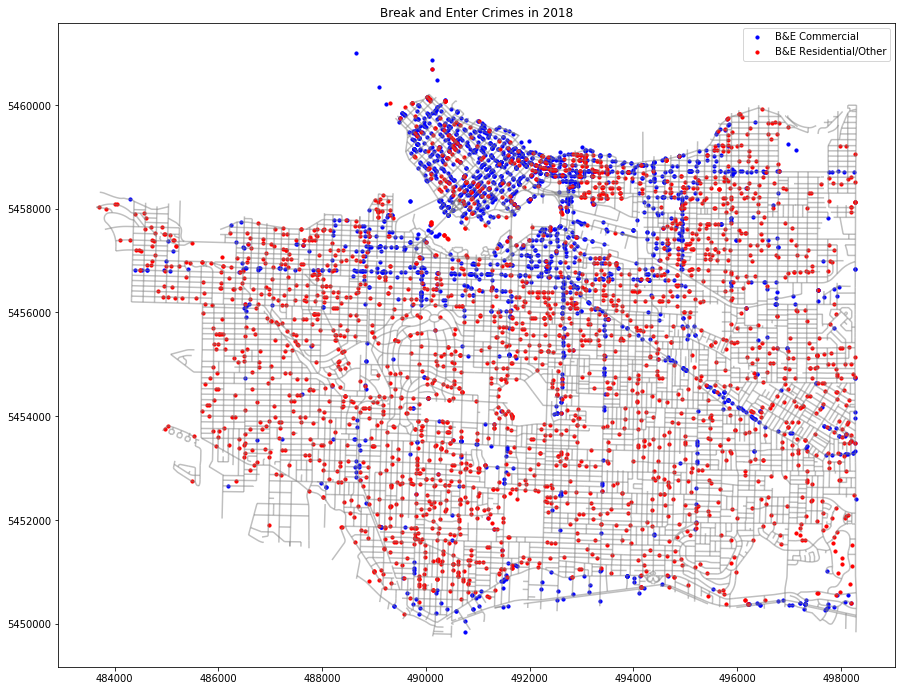

In [78]:
fig3, ax3 = plt.subplots(figsize=(15,15))
van_map.plot(ax=ax3, alpha=0.5, color='grey', edgecolor='k')
crime_shp_2018[crime_shp_2018['TYPE']=='Break and Enter Commercial'].plot(ax=ax3, markersize=10, color='blue', marker='o', label='B&E Commercial')
crime_shp_2018[crime_shp_2018['TYPE']=='Break and Enter Residential/Other'].plot(ax=ax3, markersize=10, color='red', marker='o', label='B&E Residential/Other')
plt.title('Break and Enter Crimes in 2018')
plt.legend()
plt.show()

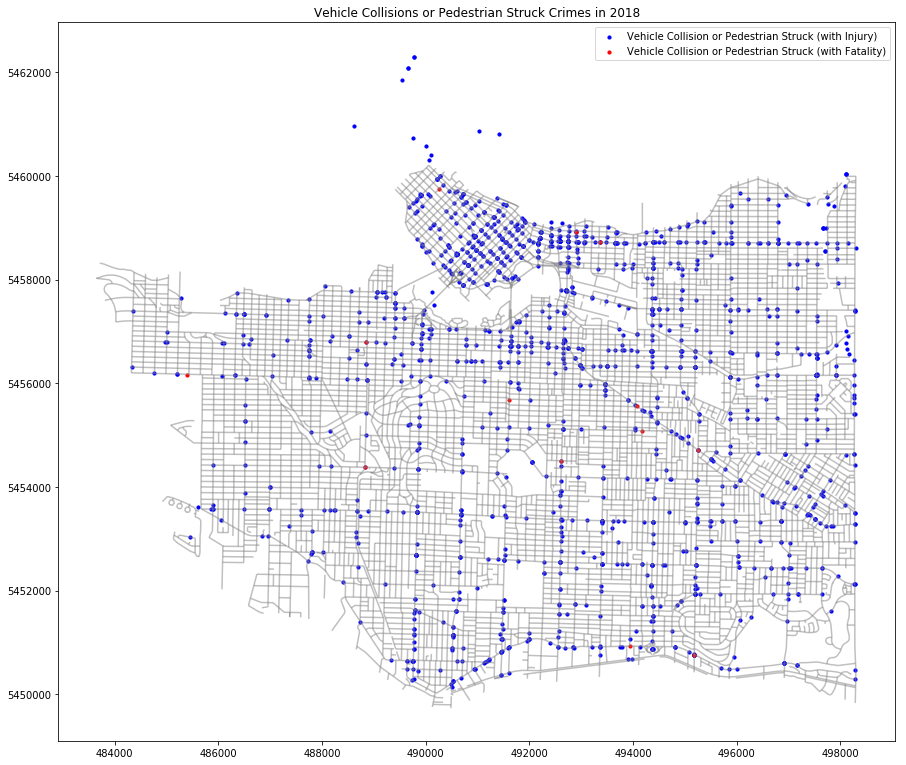

In [79]:
fig4, ax4 = plt.subplots(figsize=(15,15))
van_map.plot(ax=ax4, alpha=0.5, color='grey', edgecolor='k')
crime_shp_2018[crime_shp_2018['TYPE']=='Vehicle Collision or Pedestrian Struck (with Injury)'].plot(ax=ax4, markersize=10, color='blue', marker='o', label='Vehicle Collision or Pedestrian Struck (with Injury)')
crime_shp_2018[crime_shp_2018['TYPE']=='Vehicle Collision or Pedestrian Struck (with Fatality)'].plot(ax=ax4, markersize=10, color='red', marker='o', label='Vehicle Collision or Pedestrian Struck (with Fatality)')
plt.title('Vehicle Collisions or Pedestrian Struck Crimes in 2018')
plt.legend()
plt.show()

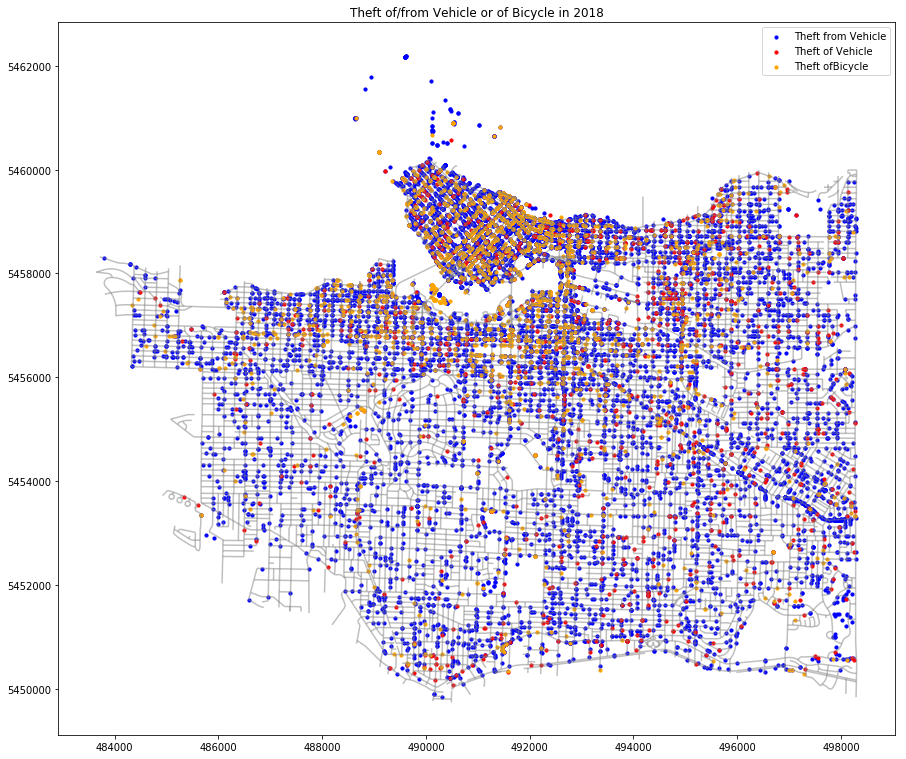

In [80]:
fig5, ax5 = plt.subplots(figsize=(15,15))
van_map.plot(ax=ax5, alpha=0.5, color='grey', edgecolor='k')
crime_shp_2018[crime_shp_2018['TYPE']=='Theft from Vehicle'].plot(ax=ax5, markersize=10, color='blue', marker='o', label='Theft from Vehicle')
crime_shp_2018[crime_shp_2018['TYPE']=='Theft of Vehicle'].plot(ax=ax5, markersize=10, color='red', marker='o', label='Theft of Vehicle')
crime_shp_2018[crime_shp_2018['TYPE']=='Theft of Bicycle'].plot(ax=ax5, markersize=10, color='orange', marker='o', label='Theft ofBicycle')
plt.title('Theft of/from Vehicle or of Bicycle in 2018')
plt.legend()
plt.show()

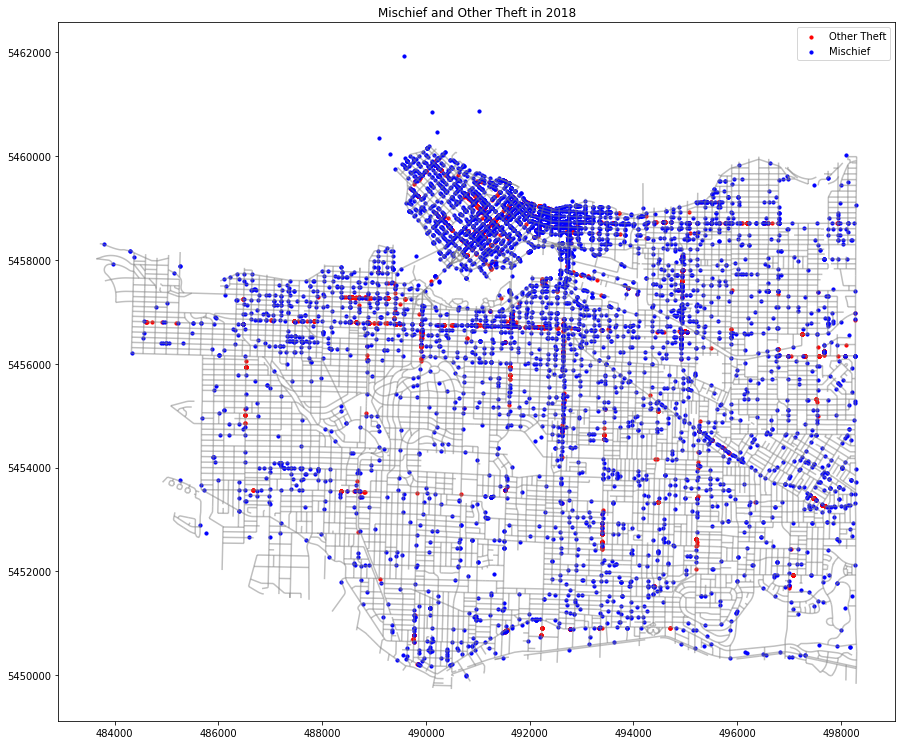

In [81]:
fig6, ax6 = plt.subplots(figsize=(15,15))
van_map.plot(ax=ax6, alpha=0.5, color='grey', edgecolor='k')
crime_shp_2018[crime_shp_2018['TYPE']=='Other Theft'].plot(ax=ax6, markersize=10, color='red', marker='o', label='Other Theft')
crime_shp_2018[crime_shp_2018['TYPE']=='Mischief'].plot(ax=ax6, markersize=10, color='blue', marker='o', label='Mischief')
plt.title('Mischief and Other Theft in 2018')
plt.legend()
plt.show()

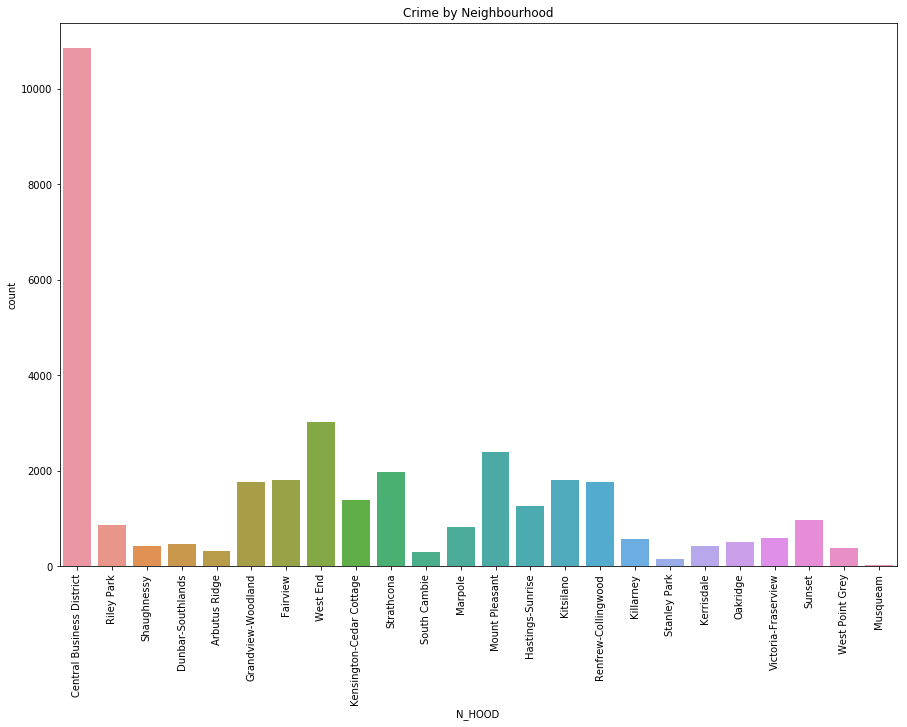

In [82]:
fig7, ax7 = plt.subplots(figsize=(15,10))
sns.countplot(x='N_HOOD', data=crime_shp_2018, ax=ax7)
plt.xticks(rotation=90)
plt.title('Crime by Neighbourhood')
plt.show()

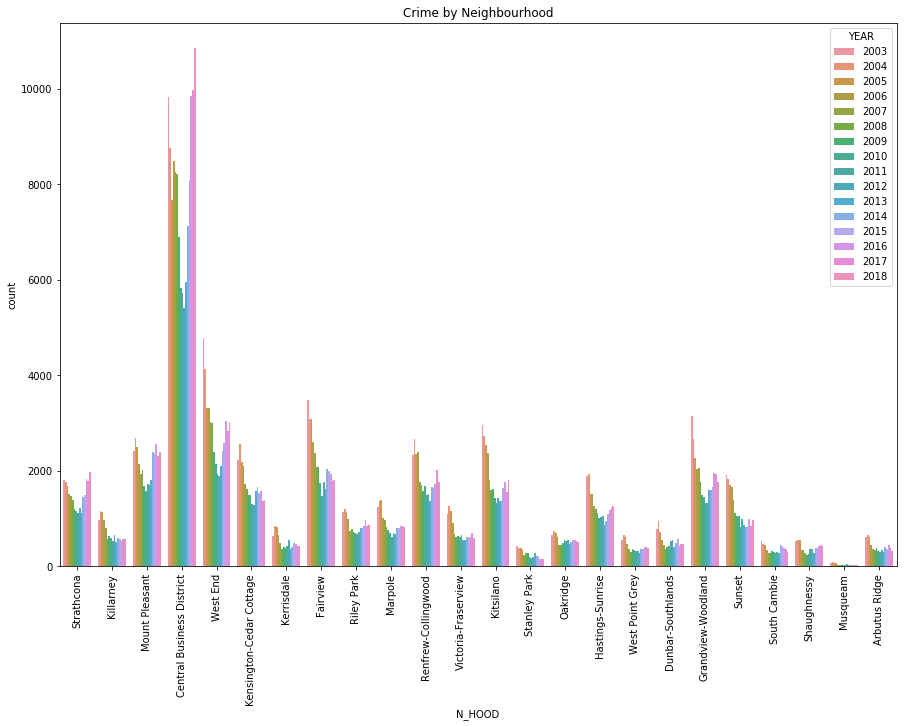

In [83]:
fig8, ax8 = plt.subplots(figsize=(15,10))
sns.countplot(x='N_HOOD', hue='YEAR',data=crime_shp, ax=ax8)
plt.xticks(rotation=90)
plt.title('Crime by Neighbourhood')
plt.show()

May want to look into the population density for each neighbourhood. While Central Business District has the most number of crimes, it may be more densely populated than all of the other neighbourhoods. Crimes such as 'Break and Enter Commercial' will also increase crimes in neighbourhoods where there are more commercial properties. 

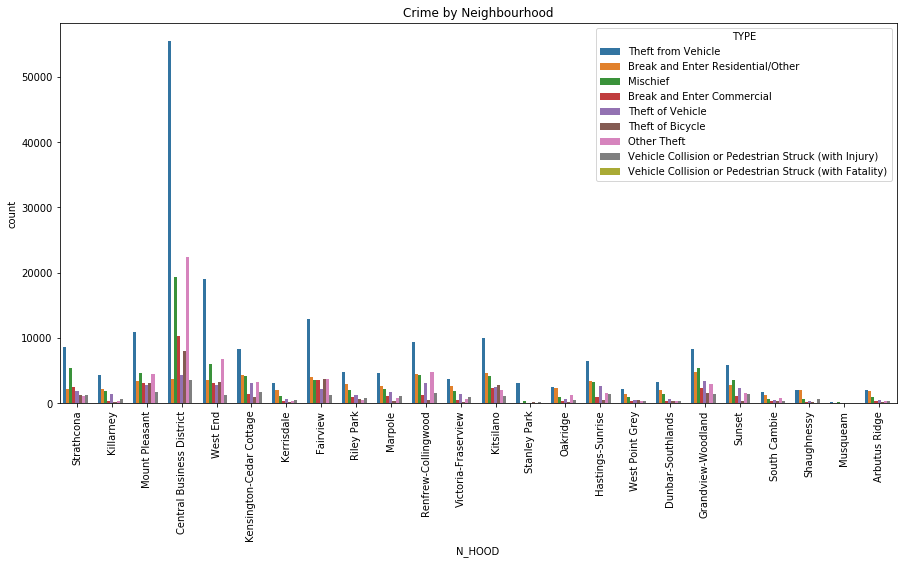

In [84]:
fig9, ax9 = plt.subplots(figsize=(15,7))
sns.countplot(x='N_HOOD', hue='TYPE', data=crime_shp, ax=ax9)
plt.xticks(rotation=90)
plt.title('Crime by Neighbourhood')
plt.show()

# Heatmap of Crime by Neighbourhood
Try and create a heatmap of total crimes by neighbourhood.

In [85]:
nhood_shp = gpd.read_file('.\local_area_boundary_shp\local_area_boundary.shp')


In [86]:
names_nhood_crime = list(crime_shp['N_HOOD'].unique())
names_nhood = list(nhood_shp['NAME'].unique())

for nhood in names_nhood_crime:
    if nhood not in names_nhood:
        print(nhood)

Central Business District
Stanley Park
Musqueam
Arbutus Ridge


In [87]:
for nhood in names_nhood:
    if nhood not in names_nhood_crime:
        print(nhood)

Downtown
Arbutus-Ridge


In [88]:
#test = nhood_shp.copy()
nhood_shp['coords'] = nhood_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
nhood_shp['coords'] = [coords[0] for coords in nhood_shp['coords']]

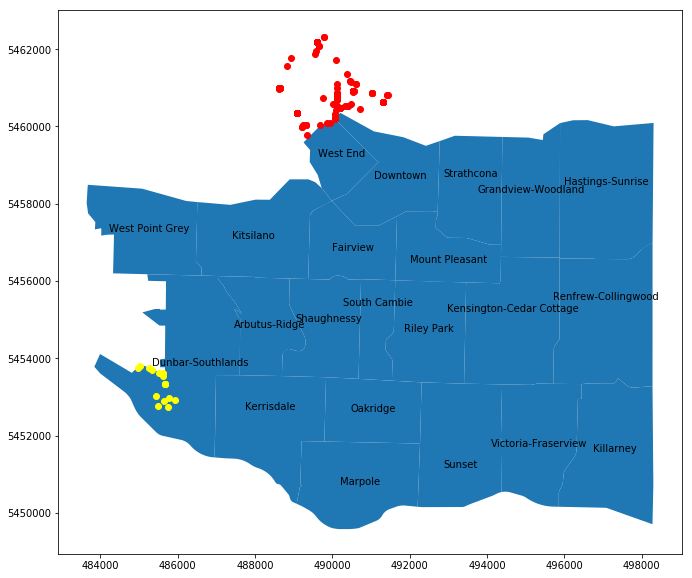

In [89]:
fig_cmap, ax_cmap = plt.subplots(figsize = (15,10))
nhood_shp.plot(ax = ax_cmap)
for idx, row in nhood_shp.iterrows():
    plt.annotate(s=row['NAME'], xy=row['coords'],
                 horizontalalignment='center')
crime_shp_2018[crime_shp_2018['N_HOOD']=='Stanley Park'].plot(ax = ax_cmap, color='red')
crime_shp_2018[crime_shp_2018['N_HOOD']=='Musqueam'].plot(ax = ax_cmap, color='yellow')

In [90]:
# So determined how to create the labels for the map 
# Next will need to add the crime data to the nhood_shp dataframe so that I can create a chloropleth map 
# Group the data in the crime_shp_2018 file for the total numbers

data_to_add = crime_shp_2018.groupby(['N_HOOD']).count()
data_to_add.rename(index={'Central Business District':'Downtown', 'Arbutus Ridge':'Arbutus-Ridge'}, inplace=True)
data_to_add = data_to_add['TYPE']
data_to_add = data_to_add.rename('NumCrimes')


In [91]:
nhood_shp.set_index('NAME', inplace=True)

In [92]:
nhood_shp = nhood_shp.merge(data_to_add, how='right', left_index=True, right_index=True)

In [93]:
# Based on the data above and what was plotted, it seems like Stanley Park is not included in the list of neighbourhoods
# Musqueam seems to be a part of Dunbar-Southlands so I will add its value into the Dunbar-Southlands value
dso_value = nhood_shp.loc['Dunbar-Southlands','NumCrimes']
musq_value = nhood_shp.loc['Musqueam','NumCrimes']
nhood_shp.loc['Dunbar-Southlands','NumCrimes'] = dso_value + musq_value
nhood_shp.drop(index=['Musqueam', 'Stanley Park'],inplace=True)


In [94]:
nhood_shp['Percentage'] = nhood_shp['NumCrimes']/(nhood_shp['NumCrimes'].sum())*100


In [95]:
for idx, row in nhood_shp.iterrows():
    print(idx, '\n', row, '\n')

Arbutus-Ridge 
 MAPID                                                        AR
geometry      POLYGON ((488896.3689033413 5456062.110754157,...
coords                    (488389.880749024, 5454802.307026402)
NumCrimes                                                   311
Percentage                                             0.897987
Name: Arbutus-Ridge, dtype: object 

Downtown 
 MAPID                                                       CBD
geometry      POLYGON ((491836.3489202514 5459718.918809408,...
coords                  (491767.92846015946, 5458662.720483709)
NumCrimes                                                 10843
Percentage                                              31.3083
Name: Downtown, dtype: object 

Dunbar-Southlands 
 MAPID                                                        DS
geometry      POLYGON ((487615.5153227601 5455027.114970088,...
coords                   (486576.4026880855, 5453812.158302454)
NumCrimes                                           

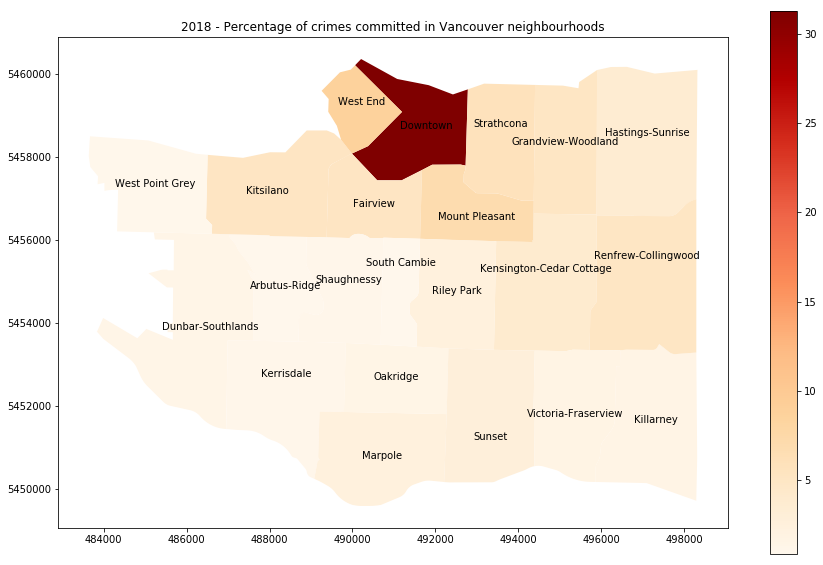

In [96]:
nhood_shp['coords'] = nhood_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
nhood_shp['coords'] = [coords[0] for coords in nhood_shp['coords']]
fig_test, ax_test = plt.subplots(figsize=(15,10))
nhood_shp.plot(ax = ax_test, column='Percentage', cmap='OrRd', legend=True)
for idx, row in nhood_shp.iterrows():
    plt.annotate(s=idx, xy=row['coords'],
                 horizontalalignment='center')
plt.title('2018 - Percentage of crimes committed in Vancouver neighbourhoods')
plt.show()

# Questions regarding how to model geographical data
- Given that the neighbourhood is included in this, I could try and run an ML model based on the neighbourhood/location though I doubt that the accuracy would be any good without extra features
    - Extra features could be: 
    - Number of people living in the neighbourhood
    - Level of income in the neighbourhood 
    - Residential vs Commercial properties in the neighbourhood
    - Weather on the day of the crime 


# Time Series Analysis
Will plot the different crimes using a time series analysis to see if there are any trends. Will identify trends by graphing the type of crime for each year on one graph to see if there are trends. 

Here, if we decide to use the CSV data and ignore the locations, we can graph the time series for all of the types of crime. 

In [97]:
loop_dict(check_null(crime_csv))

TYPE : 0
YEAR : 0
MONTH : 0
DAY : 0
HOUR : 60340
MINUTE : 60340
HUNDRED_BLOCK : 13
NEIGHBOURHOOD : 62772
X : 0
Y : 0


In [98]:
crime_date_csv = pd.DataFrame()
crime_date_csv['DATETIME']=pd.to_datetime(crime_csv['YEAR'].astype(str)+'-'+crime_csv['MONTH'].astype(str)+'-'+crime_csv['DAY'].astype(str))
crime_date_csv['TYPE']=crime_csv['TYPE']
crime_date_csv['VALUE'] = 1
crime_date_csv = crime_date_csv.groupby(['DATETIME','TYPE']).count()
crime_date_csv = crime_date_csv.unstack()
crime_date_csv.columns = crime_date_csv.columns.droplevel()
crime_date_csv.fillna(value=0, inplace=True)
check_null(crime_date_csv)
crime_date_csv

TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
DATETIME,,,,,,,,,,,
2003-01-01,10.0,22.0,0.0,33.0,33.0,5.0,65.0,4.0,15.0,0.0,8.0
2003-01-02,7.0,29.0,0.0,15.0,14.0,2.0,55.0,1.0,22.0,0.0,4.0
2003-01-03,14.0,26.0,0.0,22.0,14.0,9.0,54.0,2.0,15.0,0.0,4.0
2003-01-04,5.0,19.0,0.0,18.0,13.0,8.0,52.0,5.0,22.0,0.0,5.0
2003-01-05,11.0,10.0,0.0,17.0,12.0,6.0,35.0,6.0,22.0,0.0,1.0
2003-01-06,7.0,18.0,0.0,21.0,13.0,7.0,49.0,4.0,16.0,0.0,4.0
2003-01-07,11.0,21.0,0.0,13.0,16.0,7.0,53.0,2.0,27.0,1.0,4.0
2003-01-08,14.0,21.0,0.0,15.0,17.0,6.0,55.0,5.0,21.0,0.0,4.0
2003-01-09,7.0,25.0,0.0,14.0,8.0,16.0,36.0,2.0,12.0,1.0,7.0


In [99]:
crime_date = pd.DataFrame()
crime_date['DATETIME']=pd.to_datetime(crime_shp['YEAR'].astype(str)+'-'+crime_shp['MONTH'].astype(str)+'-'+crime_shp['DAY'].astype(str))
# +crime_shp['HOUR'].astype(str)+':'+crime_shp['MINUTE'].astype(str))
crime_date['TYPE']=crime_shp['TYPE']
crime_date['N_HOOD']=crime_shp['N_HOOD']
crime_date = crime_date.groupby(['DATETIME','TYPE']).count()
crime_date = crime_date.unstack()
crime_date.columns = crime_date.columns.droplevel()
crime_date.fillna(value=0, inplace=True)
check_null(crime_date)

{'Break and Enter Commercial': 0,
 'Break and Enter Residential/Other': 0,
 'Mischief': 0,
 'Other Theft': 0,
 'Theft from Vehicle': 0,
 'Theft of Bicycle': 0,
 'Theft of Vehicle': 0,
 'Vehicle Collision or Pedestrian Struck (with Fatality)': 0,
 'Vehicle Collision or Pedestrian Struck (with Injury)': 0}

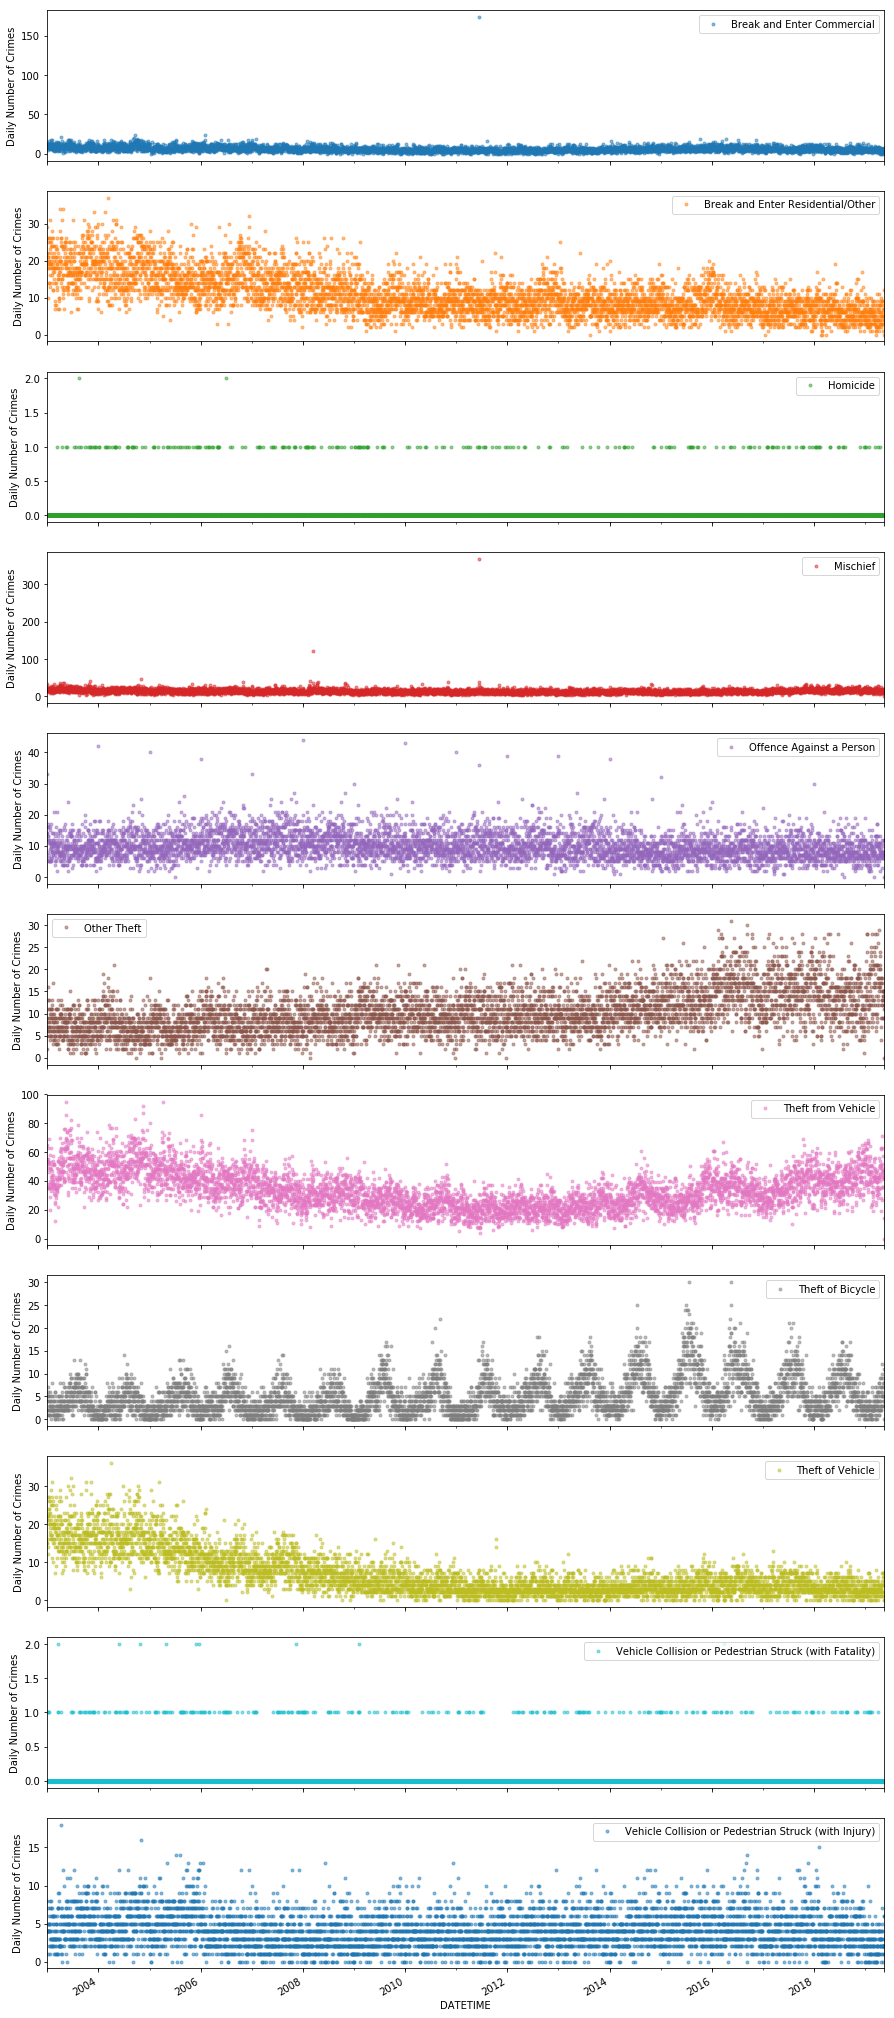

In [100]:
cols_to_plot = list(crime_date_csv.columns)
axes = crime_date_csv[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15,40), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Number of Crimes')

#crime_date['Break and Enter Commercial'].plot(marker='.', alpha=0.5, figsize=(15,5))